In [18]:
import sys
import os


module_path = os.path.abspath(os.path.join('..', "openpolicedata"))
if module_path not in sys.path:
    sys.path.append(module_path)

import openpolicedata as opd
import numpy as np

In [2]:
src = opd.Source("Virginia Community Policing Act")
data = src.load_from_url(year=2020, jurisdiction_filter="Herndon Police Department")
df = data.table

In [3]:
df.columns

Index(['incident_date', 'agency_name', 'jurisdiction', 'reason_for_stop',
       'race', 'ethnicity', 'age', 'gender', 'action_taken', 'violation_type',
       'specific_violation', 'person_searched', 'vehicle_searched',
       'additional_arrest'],
      dtype='object')

In [7]:
df["month"] = df["incident_date"].dt.to_period("M")
df["month"].unique()

df["race_eth"] = df["race"]
df.loc[df["ethnicity"] == "HISPANIC", "race_eth"] = "HISPANIC"
df.loc[df["ethnicity"] == "UNKNOWN", "race_eth"] = "UNKNOWN"

In [15]:
# Totals for reason for stop
df["reason_for_stop"].value_counts()

TRAFFIC VIOLATION      1536
EQUIPMENT VIOLATION     119
OTHER                    27
CALLS FOR SERVICE         2
TERRY STOP                1
Name: reason_for_stop, dtype: int64

<AxesSubplot:xlabel='month'>

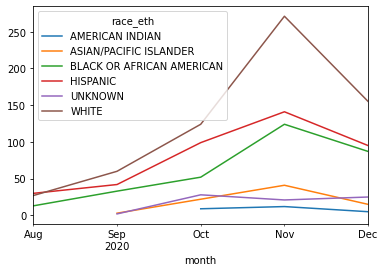

In [16]:
a = df[df["reason_for_stop"] == "TRAFFIC VIOLATION"]
a = a.groupby(["month","race_eth"]).size().unstack("race_eth")
a.plot.line()

In [24]:
action_by_race = df.groupby(["action_taken","race_eth"]).size().unstack("race_eth")
perc_by_race = np.round(action_by_race / action_by_race.sum() *100)
perc_by_race

race_eth,AMERICAN INDIAN,ASIAN/PACIFIC ISLANDER,BLACK OR AFRICAN AMERICAN,HISPANIC,UNKNOWN,WHITE
action_taken,,,,,,
ARREST,NaN,NaN,NaN,3.0,4.0,1.0
CITATION/SUMMONS,72.0,54.0,57.0,50.0,31.0,67.0
NO ENFORCEMENT ACTION,NaN,NaN,1.0,0.0,NaN,0.0
WARNING,28.0,46.0,42.0,46.0,66.0,32.0


In [6]:
# Totals for people searched
df["person_searched"].value_counts()

NO     1683
YES       2
Name: person_searched, dtype: int64

In [8]:
# Totals for vehicle search
df["vehicle_searched"].value_counts()

NO     1677
YES       8
Name: vehicle_searched, dtype: int64

In [14]:
df["additional_arrest"].value_counts()

NO    1685
Name: additional_arrest, dtype: int64

race_eth,AMERICAN INDIAN,ASIAN/PACIFIC ISLANDER,BLACK OR AFRICAN AMERICAN,HISPANIC,UNKNOWN,WHITE
reason_for_stop,,,,,,
CALLS FOR SERVICE,NaN,NaN,NaN,1.0,NaN,1.0
EQUIPMENT VIOLATION,6.0,7.0,26.0,45.0,9.0,26.0
OTHER,NaN,1.0,2.0,4.0,NaN,20.0
TERRY STOP,NaN,NaN,1.0,NaN,NaN,NaN
TRAFFIC VIOLATION,26.0,81.0,309.0,407.0,76.0,637.0
